In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scienceplots
import sympy as sp

sp.init_printing()

#Exibição dos gráficos em janela externa:
#%matplotlib qt

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12, 6)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1200x600 with 0 Axes>

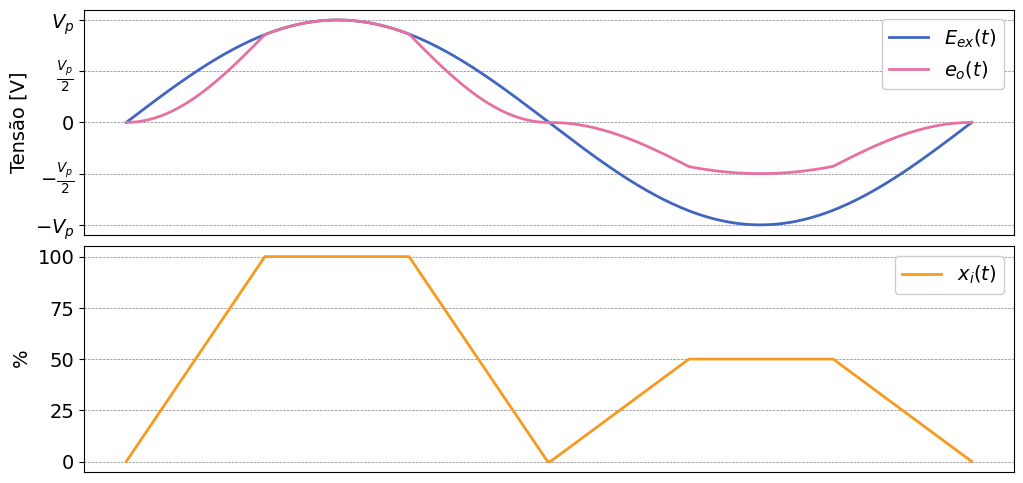

In [2]:
t = np.linspace(0, (2*np.pi), 300)

eex = np.sin(t)

x = 100

xi = np.block([np.linspace(0, 100, 50), (100*np.ones(50)), np.linspace(100, 0, 50), np.linspace(0, 50, 50), (50*np.ones(50)), np.linspace(50, 0, 50)])

eo = ((xi/x)*eex)

plt.figure(1)
plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0.05)
plt.subplot(2, 1, 1)
plt.plot(t, eex, label='$E_{ex}(t)$')
plt.plot(t, eo, label='$e_o(t)$')
plt.ylabel('Tensão [V]')
plt.yticks([-1, -0.5, 0, 0.5,  1], ['$-V_p$', '$-\\frac{V_p}{2}$', '$0$', '$\\frac{V_p}{2}$', '$V_p$'])
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, xi, label='$x_i(t)$', color='C4')
plt.ylabel('$\%$')
plt.xticks([], [])
plt.legend(loc='upper right')
plt.savefig('sen.eps', dpi=600, transparent=True, bbox_inches='tight')

In [3]:
va = sp.Symbol('Va')
vb = sp.Symbol('Vb')

rx = sp.Symbol('Rx')
r2 = sp.Symbol('R2')
r3 = sp.Symbol('R3')
r4 = sp.Symbol('R4')

In [4]:
i1 = ((va-vb)/(r3+r4))

i1

In [5]:
i2 = ((va-vb)/(rx+r2))

i2

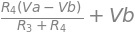

In [6]:
vc = (vb+(r4*i1))

vc

In [7]:
vd = (vb+(rx*i2))

vd

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


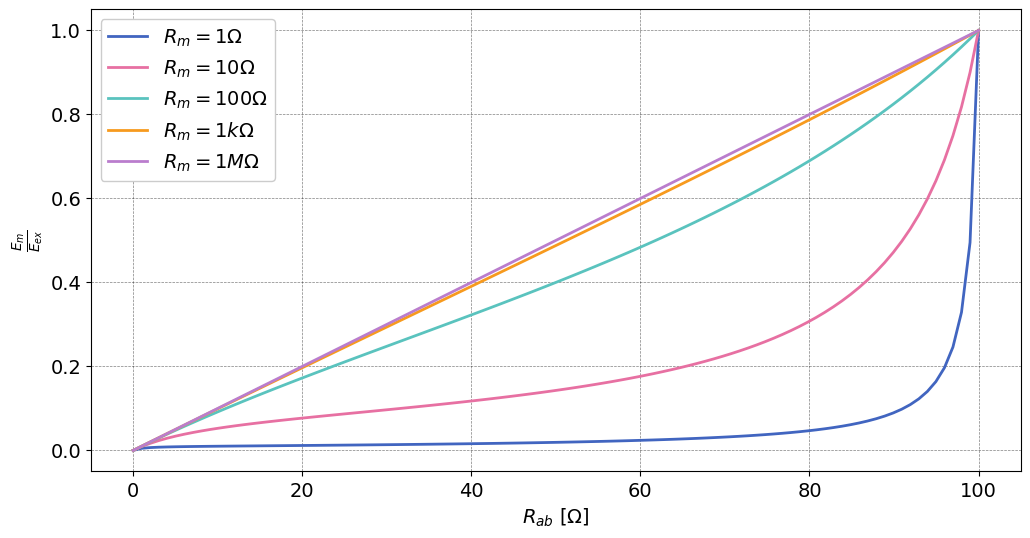

In [8]:
rab = np.linspace(0, 100, 100)

def f(rab, rm):
    rp = ((rab*rm)/(rab+rm))
    req = ((100-rab)+rp)
    return (rp/req)

y1 = f(rab, 1)
y2 = f(rab, 10)
y3 = f(rab, 100)
y4 = f(rab, 1000)
y5 = f(rab, 1000000)

plt.figure(2)
plt.plot(rab, y1, label='$R_m = 1\Omega$')
plt.plot(rab, y2, label='$R_m = 10\Omega$')
plt.plot(rab, y3, label='$R_m = 100\Omega$')
plt.plot(rab, y4, color='C4', label='$R_m = 1k\Omega$')
plt.plot(rab, y5, color='C5', label='$R_m = 1M\Omega$')
plt.xlabel('$R_{ab}$ [$\Omega$]')
plt.ylabel('$\\frac{E_m}{E_{ex}}$')
plt.legend()
plt.savefig('pot.eps', dpi=600, transparent=True, bbox_inches='tight')

In [9]:
r1 = sp.Symbol('R_1')
r2 = sp.Symbol('R_2')
c1 = sp.Symbol('C_1')
c2 = sp.Symbol('C_2')
ei = sp.Symbol('e_i')
s = sp.Symbol('s')

zab = ((1/(s*c1))*(r2+(1/(s*c2))))

zab

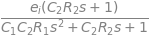

In [10]:
vab = ((zab/(r1+zab))*ei)

vab.simplify()

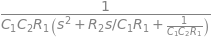

In [11]:
eo = (((1/(s*c2))/(r2+(1/(s*c2))))*vab)

den = (((eo.simplify()/ei)**(-1))/(c1*c2*r1)).simplify()

num = (1/(c1*c2*r1))

num/den

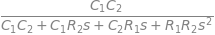

In [12]:
G1 = ((1/r1*c1)/(s+(1/r1*c1)))
G2 = ((1/r2*c2)/(s+(1/r2*c2)))

g = (G1*G2).expand()

g

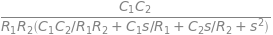

In [13]:
den = ((g/(c1*c2))**(-1))

den = (den/(r1*r2)).simplify()

num = ((c1*c2)/(r1*r2))

(num/den)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


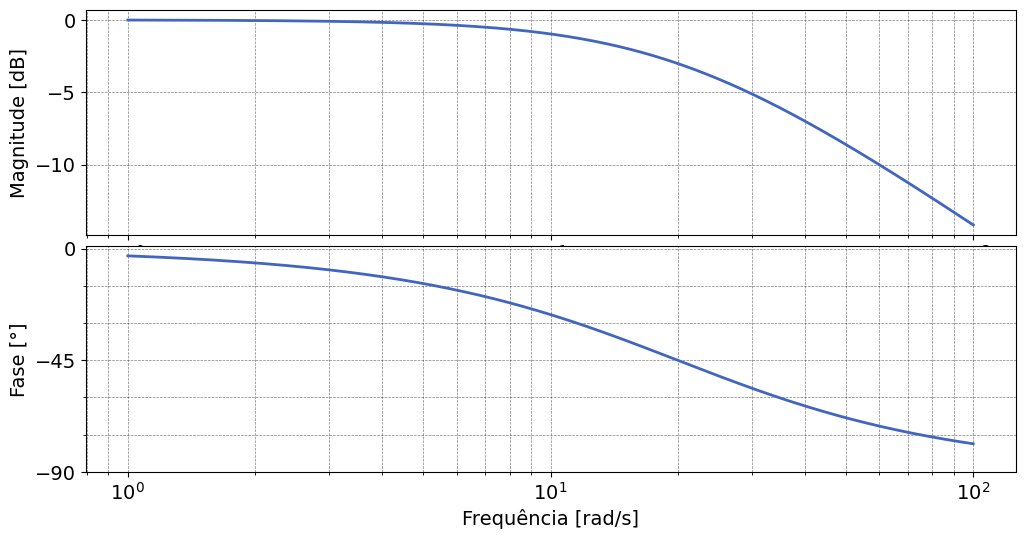

In [14]:
s = ct.tf('s')

tf = (2/((0.1*s)+2))

plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0.05)
bd = ct.bode(tf, dB=True)
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [°]')
plt.subplot(2, 1, 1)
plt.ylabel('Magnitude [dB]')
plt.savefig('bda.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


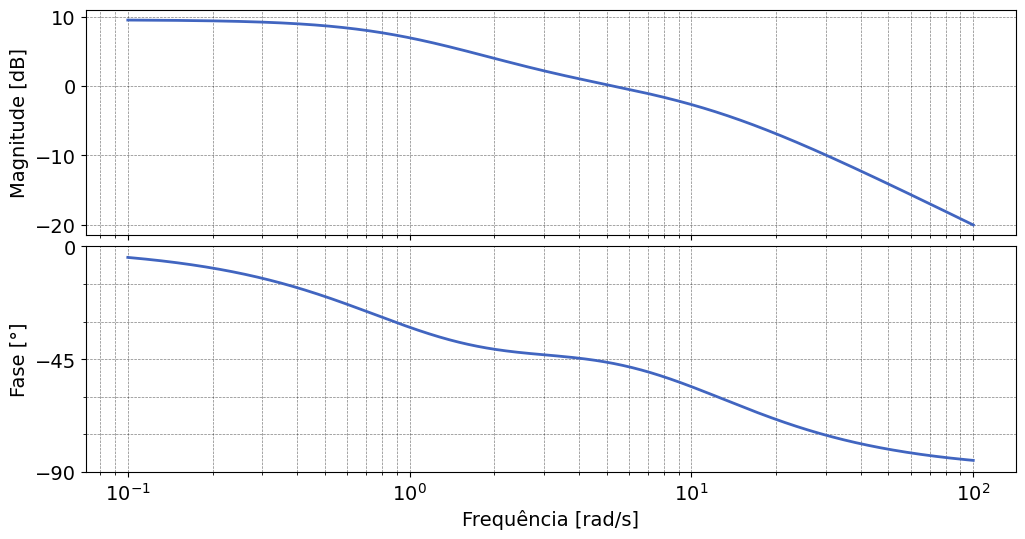

In [15]:
s = ct.tf('s')

tf = ((s+3)/(((0.1*s)+1)*(s+1)))

plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0.05)
bd = ct.bode(tf, dB=True)
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [°]')
plt.subplot(2, 1, 1)
plt.ylabel('Magnitude [dB]')
plt.savefig('bdb.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


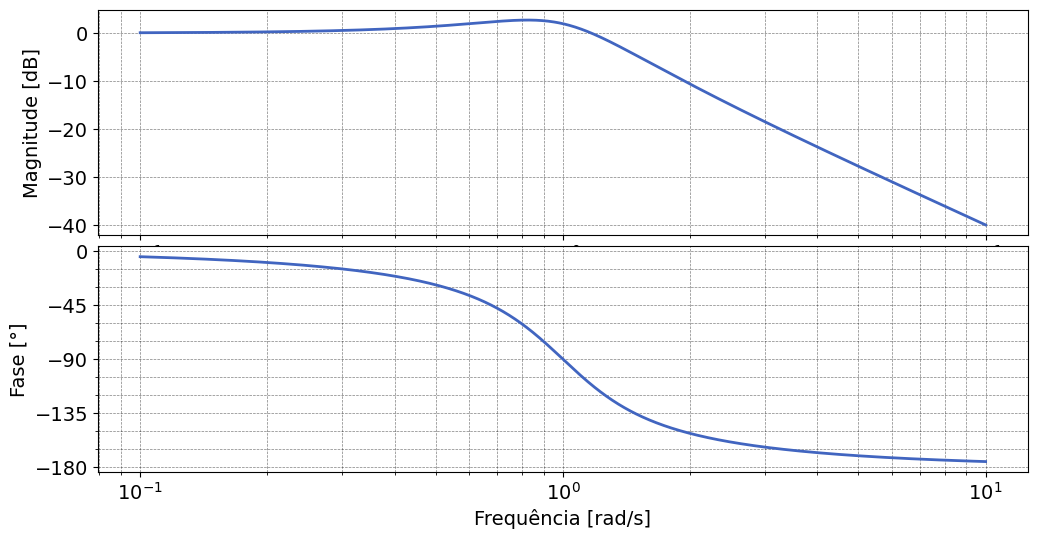

In [16]:
s = ct.tf('s')

tf = (1/((s**2)+(0.8*s)+1))

plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0.05)
bd = ct.bode(tf, dB=True)
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [°]')
plt.subplot(2, 1, 1)
plt.ylabel('Magnitude [dB]')
plt.savefig('bdc.eps', dpi=600, transparent=True, bbox_inches='tight')